In [1]:
import pygame

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def load_image(path, mode="numpy"):
    img = pygame.image.load(path)
    if mode=="numpy":
        img_data = np.array(pygame.surfarray.array3d(img), np.uint8).transpose(1,0,2)
        return img_data
    elif mode=="pygame":
        return img

In [32]:
def show_image(img_data, tile_size=16, manual=False):
    if not manual:
        plt.figure()
    plt.imshow(img_data)

    ax = plt.gca()
    ax.set_xticks(np.arange(-0.5, img_data.shape[1], tile_size), minor=True)
    ax.set_yticks(np.arange(-0.5, img_data.shape[0], tile_size), minor=True)
    ax.grid(which='minor', color='gray', linestyle='--', linewidth=2)

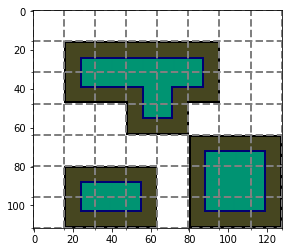

In [4]:
source = load_image("data/wfc_tiles/source.png")
show_image(source)

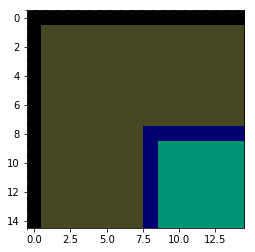

In [5]:
show_image(source[16:31,16:31,:])

In [6]:
def tileset(img, tile_size=16):
    return (lambda x,y: img[y*tile_size:(y+1)*tile_size,x*tile_size:(x+1)*tile_size,:])

In [7]:
tls = tileset(source)

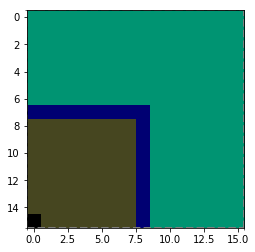

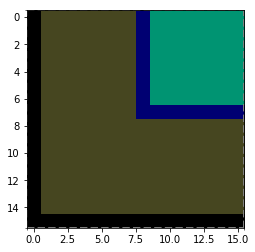

In [8]:
show_image(tls(3,2))
show_image(tls(3,3))

In [9]:
%timeit hash(str(source.data))

717 ns ± 16.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [10]:
def allRots(img):
    return [
        img,
        np.rot90(img,1),
        np.rot90(img,2),
        np.rot90(img,3)
    ]

In [11]:
def allHashes(img):
    return [ hash(str(x)) for x in allRots(img) ]

6.32 ms ± 88.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


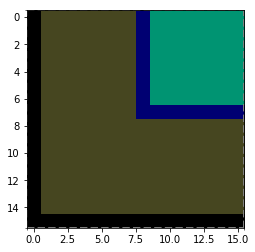

In [12]:
show_image(tls(3,3))
%timeit allHashes(tls(3,3))

In [13]:
tile_size = 16
tls = tileset(source)

tiles = {}
hashes = []

src_arr = np.zeros((int(source.shape[0]/tile_size),int(source.shape[1]/tile_size)),dtype=np.int32)

for y in range(int(source.shape[0]/tile_size)):
    for x in range(int(source.shape[1]/tile_size)):
        print("Coords:",x,y)
        hs = allHashes(tls(x,y))
        print(hs)
        
        if len(set.intersection(set(hs),set(tiles.keys())))==0:
            for img in allRots(tls(x,y)):
                h = hash(str(img))
                tiles[h] = img
                hashes.append(h)
        
        src_arr[y,x] = hashes.index(hash(str(tls(x,y))))

Coords: 0 0
[-6749031487723130569, -6749031487723130569, -6749031487723130569, -6749031487723130569]
Coords: 1 0
[-6749031487723130569, -6749031487723130569, -6749031487723130569, -6749031487723130569]
Coords: 2 0
[-6749031487723130569, -6749031487723130569, -6749031487723130569, -6749031487723130569]
Coords: 3 0
[-6749031487723130569, -6749031487723130569, -6749031487723130569, -6749031487723130569]
Coords: 4 0
[-6749031487723130569, -6749031487723130569, -6749031487723130569, -6749031487723130569]
Coords: 5 0
[-6749031487723130569, -6749031487723130569, -6749031487723130569, -6749031487723130569]
Coords: 6 0
[-6749031487723130569, -6749031487723130569, -6749031487723130569, -6749031487723130569]
Coords: 7 0
[-6749031487723130569, -6749031487723130569, -6749031487723130569, -6749031487723130569]
Coords: 0 1
[-6749031487723130569, -6749031487723130569, -6749031487723130569, -6749031487723130569]
Coords: 1 1
[-3057123862777643467, 6720542279150176894, -9062865736373944103, -475896416189

In [14]:
len(hashes)

20

In [15]:
src_arr

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  8,  8,  8,  7,  0,  0],
       [ 0,  5, 10, 12, 13,  6,  0,  0],
       [ 0,  0,  0,  5,  6,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  8,  7],
       [ 0,  4,  8,  7,  0,  9, 16, 11],
       [ 0,  5, 10,  6,  0,  5, 10,  6]], dtype=int32)

In [51]:
def visualizer(tiles, hashes):
    def visualize(arr, manual=False):
        x_sz = arr.shape[1]
        y_sz = arr.shape[0]
        show_image(np.hstack([np.vstack([tiles[hashes[int(arr[y,x])]] for y in range(y_sz)]) for x in range(x_sz)]),manual=manual)
    
    return visualize

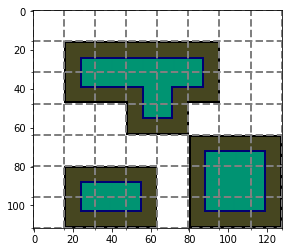

In [52]:
visualize = visualizer(tiles,hashes)
visualize(src_arr)

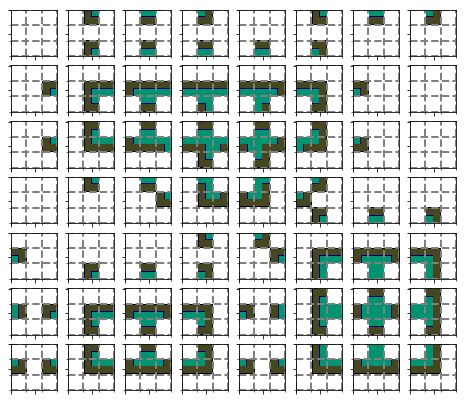

In [87]:
neighbors = []

plt.figure(figsize=(8,7))
for y in range(src_arr.shape[0]):
    for x in range(src_arr.shape[1]):
        plt.subplot(src_arr.shape[0], src_arr.shape[1], y*src_arr.shape[1]+x+1)
        plt.tick_params(labelleft=False, labeltop=False, labelright=False, labelbottom=False)
        arr = np.array([
          [0,                                src_arr[(y-1)%src_arr.shape[0],x],0],
          [src_arr[y,(x-1)%src_arr.shape[1]],src_arr[y,x],                     src_arr[y,(x+1)%src_arr.shape[1]]],
          [0,                                src_arr[(y+1)%src_arr.shape[0],x],0]
        ])
        
        fullp = (arr // 4)*4
        neighbors.append(arr)
        neighbors.append(np.rot90((arr-fullp+1)%4+fullp))
        neighbors.append(np.rot90((arr-fullp+2)%4+fullp,2))
        neighbors.append(np.rot90((arr-fullp+3)%4+fullp,3))
        
        visualize(arr, manual=True)

In [88]:
len(neighbors)

224

In [91]:
list(tiles.keys())

[6720542279150176894,
 -475896416189872571,
 -5986465870727339544,
 173614890272686441,
 7239681425407305703,
 1905920702728397196,
 7931769263439198602,
 3603687201464281774,
 -3057123862777643467,
 -6749031487723130569,
 -9062865736373944103,
 279092378455277833,
 -2138353569917513492,
 4369543295720075614]

In [92]:
tileind = lambda h: list(tiles.keys()).index(h)

In [108]:
adj = np.zeros((len(tiles.keys()), len(tiles.keys()), 4), dtype=np.uint8)

for rule in neighbors:
    ind = tileind(hashes[rule[1,1]])
    indT = tileind(hashes[rule[0,1]])
    indR = tileind(hashes[rule[1,2]])
    indB = tileind(hashes[rule[2,1]])
    indL = tileind(hashes[rule[0,1]])
    
    adj[ind,indT,0] = 1
    adj[ind,indR,1] = 1
    adj[ind,indB,2] = 1
    adj[ind,indL,3] = 1

In [109]:
adj[:,:,0]

array([[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)